In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from math import floor
from fbprophet import Prophet

import os 

from google.colab import drive
drive.mount('/content/gdrive')

np.random.seed(9001)
#WHAT!? 9000!?!?

Mounted at /content/gdrive


#Load Data

In [2]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Data/W_Store_Bin0.csv')
df=df.drop(columns=['Unnamed: 0','Weekly_Sales','Weekly_Sales_log'])
df.describe()

,log_minMax
count,143.000000
mean,0.812656
std,0.132572
min,0.000000
25%,0.757559
50%,0.824002
75%,0.891418
max,1.000000


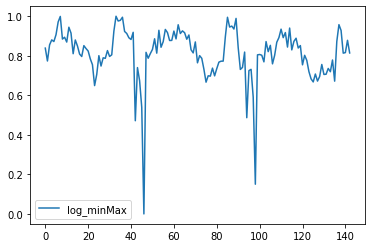

In [3]:
df.plot()
plt.show()

#Model

##Model Prep

In [4]:
#Prophet demands columns be designated as ds and y
df=df.rename(columns={'Date':'ds','log_minMax':'y'})

###Train, Validation, And Test Split

In [5]:
trainInd=floor(len(df)*.8)
valInd=floor(len(df)*.9)
train=df.loc[:trainInd,:]
val=df['ds'][trainInd:valInd]
val=val.to_frame()
test=df['ds'][valInd:]
test=test.to_frame()

##Model Creation And Validation

In [6]:
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
forecast=model.predict(val)

In [8]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2012-04-13  0.883479    0.781849    0.991623
1 2012-04-20  0.898767    0.785210    1.010403
2 2012-04-27  0.909514    0.799593    1.010419
3 2012-05-04  0.894278    0.791432    0.999341
4 2012-05-11  0.858421    0.756991    0.968278


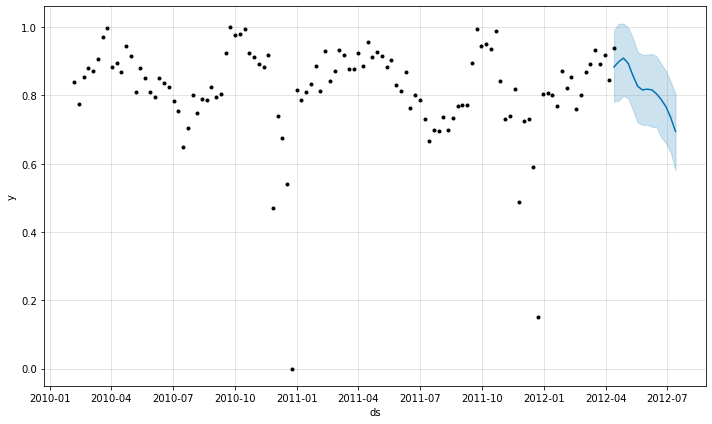

In [9]:
model.plot(forecast)
plt.show()

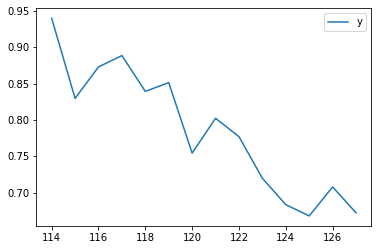

In [24]:
val2=df[trainInd:valInd]
val2.plot()
plt.show()

In [10]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0,14.0,14.000000
mean,0.800053,0.716259,0.927877,0.800053,0.800053,0.022146,0.022146,0.022146,0.022146,0.022146,0.022146,0.0,0.0,0.0,0.822199
std,0.000930,0.064395,0.063328,0.000930,0.000930,0.062619,0.062619,0.062619,0.062619,0.062619,0.062619,0.0,0.0,0.0,0.063506
min,0.798609,0.580195,0.804746,0.798609,0.798609,-0.104094,-0.104094,-0.104094,-0.104094,-0.104094,-0.104094,0.0,0.0,0.0,0.694515
25%,0.799331,0.684570,0.897412,0.799331,0.799331,-0.007393,-0.007393,-0.007393,-0.007393,-0.007393,-0.007393,0.0,0.0,0.0,0.791938
50%,0.800053,0.713832,0.920900,0.800053,0.800053,0.017641,0.017641,0.017641,0.017641,0.017641,0.017641,0.0,0.0,0.0,0.817472
75%,0.800776,0.775634,0.985787,0.800776,0.800776,0.075939,0.075939,0.075939,0.075939,0.075939,0.075939,0.0,0.0,0.0,0.877215
max,0.801498,0.799593,1.010419,0.801498,0.801498,0.108461,0.108461,0.108461,0.108461,0.108461,0.108461,0.0,0.0,0.0,0.909514


In [11]:
val_y=df['y'][trainInd:valInd]
y_hat=forecast.yhat

In [12]:
val_y=val_y.to_numpy()
y_hat=y_hat.to_numpy()

In [13]:
rss=((val_y-y_hat)**2).sum()
mse=np.mean((val_y-y_hat)**2)
print("Final rmse value is =",np.sqrt(np.mean((val_y-y_hat)**2)))

Final rmse value is = 0.05675833552378574


##Run Model Against Test Set

In [14]:
forecast=model.predict(test)

In [15]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2012-07-20  0.668553    0.556726    0.771600
1 2012-07-27  0.679774    0.572103    0.776750
2 2012-08-03  0.722096    0.615535    0.832758
3 2012-08-10  0.758981    0.653609    0.854990
4 2012-08-17  0.760781    0.649032    0.870694


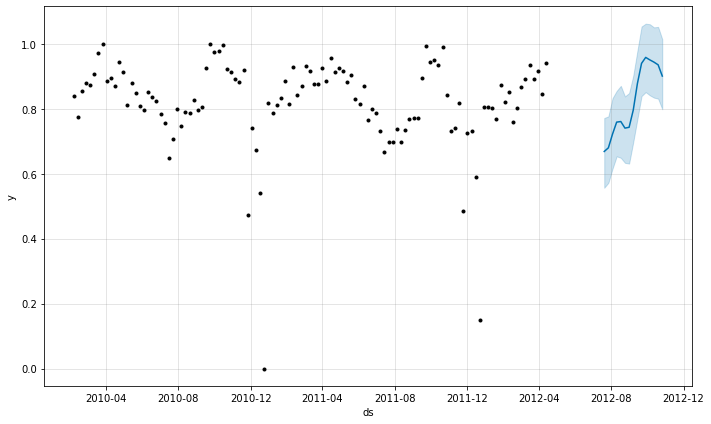

In [16]:
model.plot(forecast)
plt.show()

In [17]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.0,15.0,15.000000
mean,0.796831,0.718252,0.931171,0.796831,0.796831,0.028264,0.028264,0.028264,0.028264,0.028264,0.028264,0.0,0.0,0.0,0.825095
std,0.000994,0.108526,0.110762,0.000994,0.000994,0.108120,0.108120,0.108120,0.108120,0.108120,0.108120,0.0,0.0,0.0,0.107207
min,0.795275,0.556726,0.771600,0.795275,0.795275,-0.129834,-0.129834,-0.129834,-0.129834,-0.129834,-0.129834,0.0,0.0,0.0,0.668553
25%,0.796053,0.632392,0.843346,0.796053,0.796053,-0.055377,-0.055377,-0.055377,-0.055377,-0.055377,-0.055377,0.0,0.0,0.0,0.741787
50%,0.796831,0.697463,0.902019,0.796831,0.796831,-0.000749,-0.000749,-0.000749,-0.000749,-0.000749,-0.000749,0.0,0.0,0.0,0.796082
75%,0.797609,0.832812,1.051571,0.797608,0.797609,0.141743,0.141743,0.141743,0.141743,0.141743,0.141743,0.0,0.0,0.0,0.937685
max,0.798386,0.851342,1.062258,0.798386,0.798387,0.162150,0.162150,0.162150,0.162150,0.162150,0.162150,0.0,0.0,0.0,0.958314


In [18]:
test_y=df['y'][valInd:]
y_hat=forecast.yhat

In [19]:
test_y=test_y.to_numpy()
y_hat=y_hat.to_numpy()

In [20]:
rss=((test_y-y_hat)**2).sum()
mse=np.mean((test_y-y_hat)**2)
print("Final rmse value is =",np.sqrt(np.mean((test_y-y_hat)**2)))

Final rmse value is = 0.07048517182431013


#Pickeling the model

In [21]:
pickle.dump(model,open(r'gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Notebooks/W_Stores0_Prophet.sav','wb'))